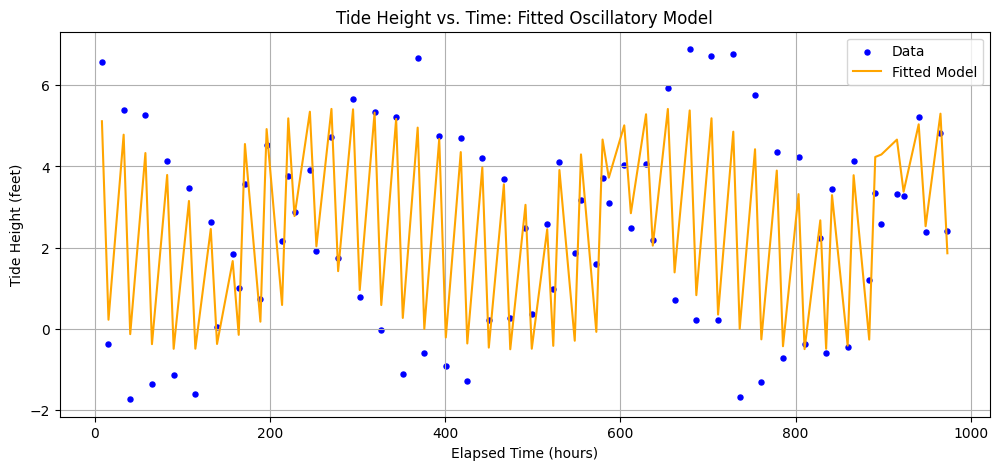

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = pd.read_table('ASTR19_F24_group_project_data.txt', skiprows=3, header=None, sep='\s+', names=["Day", "Time", "Height"])


def osc_func(t, A, omega, phi, B):
    return A * np.sin(omega * t + phi) + B

data['Time'] = pd.to_datetime(data['Time'], format='%H:%M')
data['Time_in_hours'] = data['Time'].dt.hour + data['Time'].dt.minute / 60.0

data['Elapsed_hours'] = (data['Day'] - 1) * 24 + data['Time_in_hours']

initial_guess = [2, 2*np.pi/24, 0, 3]

sigma = np.full_like(data['Height'], 0.25)

params, params_covariance = curve_fit(osc_func, data['Elapsed_hours'], data['Height'], p0=initial_guess, sigma=sigma)
A, omega, phi, B = params

plt.figure(figsize=(12, 5))
plt.scatter(data['Elapsed_hours'], data['Height'], label="Data", color='blue', s=13)
plt.plot(data['Elapsed_hours'], osc_func(data['Elapsed_hours'], *params), label="Fitted Model", color='orange')
plt.xlabel("Elapsed Time (hours)")
plt.ylabel("Tide Height (feet)")
plt.title("Tide Height vs. Time: Fitted Oscillatory Model")
plt.legend()
plt.grid(True)
plt.savefig("tide_model.pdf")
plt.show()

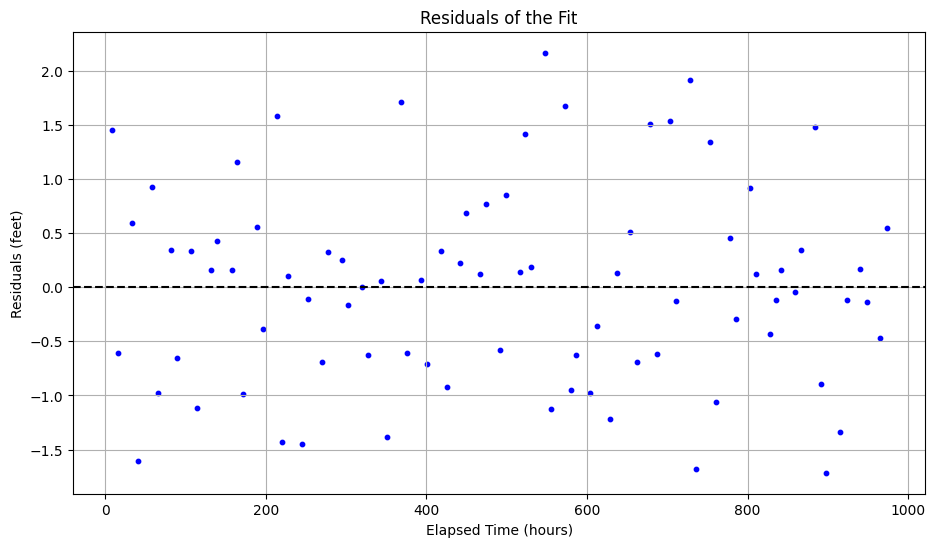

In [4]:
#PLOT RESIDUALS


residuals = data['Height'] - osc_func(data['Elapsed_hours'], *params)

# Plot the residuals
plt.figure(figsize=(11, 6))
plt.scatter(data['Elapsed_hours'], residuals, color='blue', s=10)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Elapsed Time (hours)")
plt.ylabel("Residuals (feet)")
plt.title("Residuals of the Fit")
plt.grid(True)
plt.savefig("residuals_plot.pdf")
plt.show()

Standard Deviation of Residuals: 0.914 feet


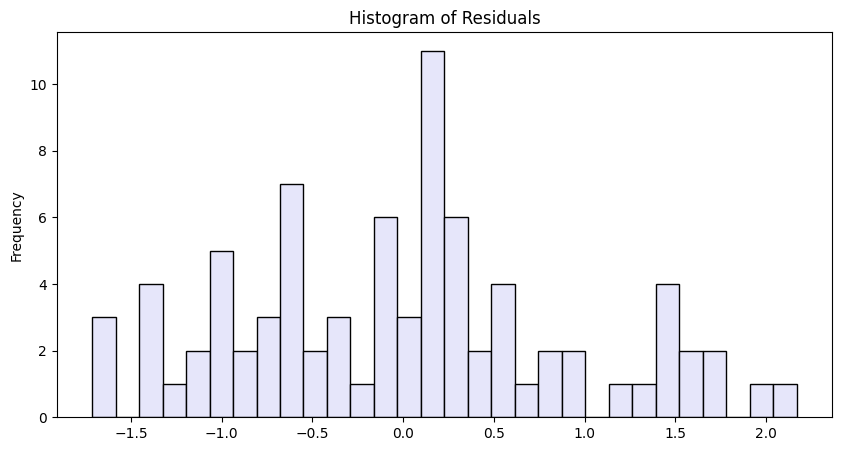

In [5]:
#HISTOGRAM OF RESIDUALS
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, edgecolor='black', color='lavender')
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")

# calculate STANDARD DEVIATION of the residuals
std_residuals = np.std(residuals)
print(f"Standard Deviation of Residuals: {std_residuals:.3f} feet")

plt.savefig("residuals_histogram.pdf")
plt.show()
